In [59]:
import pandas as pd


In [60]:
import numpy as np

In [61]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd

In [63]:
pip install numpy

In [64]:
import numpy as np

In [65]:
df=pd.read_csv('cardata.csv')

In [66]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
## First check how many categorical variables are there. Ussey pehle check df.shape()

In [68]:
df.shape

(301, 9)

In [69]:
## My Selling_Price column is dependent feature. 

In [70]:
## We can see that Fuel_Type, Seller_Type, Transmission and Owner column is categorical feature

In [71]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [72]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [73]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [74]:
print(df['Owner'].unique())

[0 1 3]


In [75]:
## Check Missing or Null Values

In [76]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [77]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [78]:
## So, we can see there are no missing values

In [79]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [80]:
## Now, since it a second hand car sale prediction modelling, so we will insert a new derived column as "Number of years" 
## instead of the column "Year", as "number of years since car was bought" controls the price of the car as the price depreciates more. 

In [81]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [82]:
## Here, Car_Name column can be left out as it plays no role in second hand sale because we have Already its selling price 
## and Present Price columns available.

In [83]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [84]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [85]:
## So, find out the total number of years of the car by suntracting Current Year i.e. 2020 from Year, and then drop these
##two columns as we don't need those.

In [86]:
final_dataset['Current_year'] = 2020

In [87]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [88]:
final_dataset['no_years'] = final_dataset['Current_year'] - final_dataset['Year']

In [89]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [90]:
final_dataset.drop('Year', axis=1,inplace=True)

In [91]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [92]:
final_dataset.drop('Current_year',axis=1,inplace=True)

In [93]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [94]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [95]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [96]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [97]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [98]:
import seaborn as sns

In [99]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [100]:
import seaborn as sns

In [101]:
sns.pairplot(final_datasettasettaset_dataset)

NameError: name 'final_datasettasettaset_dataset' is not defined

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline



corrmat = final_dataset.corr()


## Correlation uses Pearson's coefficient

## If lot of features are present, then this correlation is easy. We can use a if condition that if correlaion is > 0.8 
##then drop this feature, etc because now we dont need that feature

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

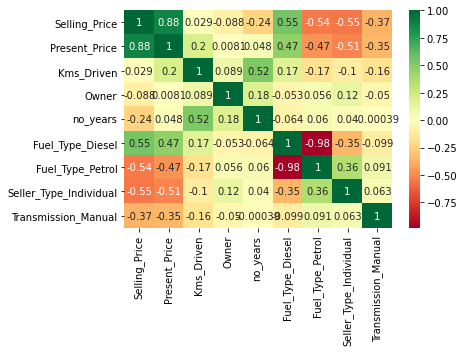

In [119]:
## Plot Heat Map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot = True, cmap ="RdYlGn")

In [ ]:
## In the heat map, the darker green colour shows that it is highly positive correlated.
## Red color shows that it is negatively correlated.

In [ ]:
final_dataset.head()

In [ ]:
## X is Independent feature(All except Selling_Price) and Y is Dependant feature(Selling_Price)

X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]



In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
pip install sklearn

In [ ]:
## Feature importance ( Which are the important features)

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

In [ ]:
print(model.feature_importances_)

In [ ]:
## Very Important
## plot graph of feature importances for better visualisation

feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
## Now, train test split has to be done

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2)
## test size is 0.2 means test dataset is 20 percent, rest is training dataset

In [105]:
X_train


,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
176,1.050,30000,0,9,0,1,1,1
128,0.870,3000,0,3,0,1,1,1
78,22.830,80000,0,10,0,1,0,0
202,5.700,28200,0,5,0,1,0,1
146,0.787,15000,0,6,0,1,1,1
...,...,...,...,...,...,...,...,...
22,8.010,50000,0,9,0,1,0,0
250,13.600,35934,0,4,1,0,0,1
220,4.430,38488,0,3,0,1,0,1
247,9.400,36000,0,5,0,1,0,1


In [106]:
X_train.shape

(240, 8)

In [ ]:
## Now, we will apply Random Forest Regressor(As its a Regressor problem) in this case. If RandomForest Regressor is used,
## then no need to scale the values.
## Because Random Forest Regressor used Decision Tree, and in decision tree, scaling is generally not required.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
##Hyperparamaters

import numpy as np

## No of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [108]:
## Perform Hyperparameter Tuning using Randomized Search CV
## Randomized Search CV helps us to find out the best parameters. (Note : Randomized Search CV is pretty much fast than 
## Grid Search CV)
from  sklearn.model_selection import RandomizedSearchCV

In [109]:
## No of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100,stop=1200,num=12)]

## No of features to consider at every split
max_features = ['auto', 'sqrt']

## Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]

## Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

## Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [ ]:
## Create a random grid
random_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
    
}

print(random_grid)

In [ ]:
## Now, Randomized Search CV will select the best parameters out of the above.

In [110]:
## Initialize a Random Forest Regressor

## Use the random grid to search for best hyperparameters
## First create the base modelto tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [111]:
## Now apply Randomized Search CV - (Verbose is used only to show the results ; n_jobs is to tell how many cores you have to use -> n_jobs=1 means all the core os laptop wil be used)
rf_random = RandomizedSearchCV(estimator =rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5,verbose=2, random_state=42,n_jobs=1)

In [112]:
rf_random.fit(X_train, Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
## Model is already created. Now we are going to do the prediction

predictions = rf_random.predict(X_test)
                               

In [114]:
predictions 


array([11.46377,  4.53969,  2.93595,  3.24716,  6.5655 ,  0.63073,
        0.64882, 20.17935, 12.50398,  4.68325,  4.4144 ,  7.73796,
        0.8765 ,  3.69227,  5.2271 ,  5.52428,  8.06255,  5.44178,
        3.41285,  5.19327,  6.47489,  0.38404, 20.17935, 11.25968,
        3.26301,  5.6228 ,  1.32425,  2.50319,  0.35584,  0.24233,
        8.08587,  4.19425,  0.69836,  4.54083,  1.87724,  0.49602,
        0.65285,  3.24266,  0.45819,  0.62635,  4.0473 ,  1.09498,
        4.04586,  1.13416,  3.98389,  5.40751,  3.5703 ,  8.25388,
        0.52369,  6.66177,  9.04326,  0.69603,  9.13208,  7.488  ,
        9.81505,  3.59435,  2.864  ,  3.02942,  1.43266,  1.37274,
        4.84203])

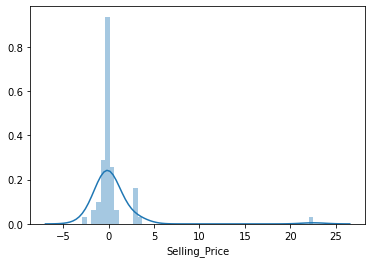

In [116]:
sns.distplot(Y_test-predictions)
## Here is the Distplot on y_test and predictions
## Here, we are taking difference between test value and predicted value, the difference of which must be least.(We are getting a closed Gaussian distribution)

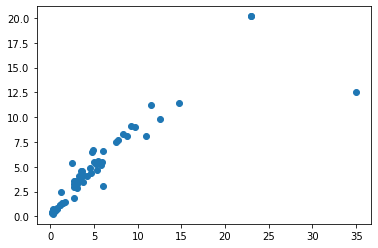

In [120]:
plt.scatter(Y_test,predictions)



In [ ]:
## So, we can see, our scatter is linearly spread so, our prediction is pretty much good

In [121]:
 ## Our model is created and now we have to pickle this file. Pickle file is serialized file
    
import pickle
##open a file , where you want to store the data

file = open('random_forest_regressor_model.pkl', 'wb')
## wb means Write Byte mode
# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
## Now the pickle file is created in the working folder.
# Now we will create requirement.txt -- Most important
## We need this requirement.txt file to state the dependant libraries needed for this car prediction model solution.
## To create the requirement file, go to Anaconda Prompt in your working environment